# Data Exploration and Feature Engineering

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
os.chdir("../Data/edited/")

C:\Users\Sam\Anaconda3\envs\capstone\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
aemo_wu_df = pd.read_csv("aemo_wu_merged.csv", index_col=0)

In [4]:
aemo_wu_df.head()

,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition
0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,Fair
1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,Fair
2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,Fair
3,2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,SSW,15.0,0.0,29.0,0.0,Fair
4,2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,SSW,18.0,0.0,29.0,0.0,Fair


In [5]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),wind_gush(mph),pressure(in),precip.(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.0
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,0.911634,29.332540,0.0
std,403.227198,6.504368,4.280321,21.330864,5.149548,5.521146,0.471126,0.0
min,761.204000,1.100000,-15.000000,5.000000,0.000000,0.000000,29.000000,0.0
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,0.000000,29.000000,0.0
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,0.000000,29.000000,0.0
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,0.000000,30.000000,0.0
max,3979.836000,42.800000,22.800000,100.000000,37.000000,58.000000,30.000000,0.0


In [6]:
numerical = ['Operational Demand (MW)','temperature(celcius)','dew_point(celcius)', 'humidity(%)', 'wind_speed(mph)','wind_gush(mph)', 'pressure(in)', 'precip.(in)' ]
categorical = ['Wind', 'Condition']

<AxesSubplot:>

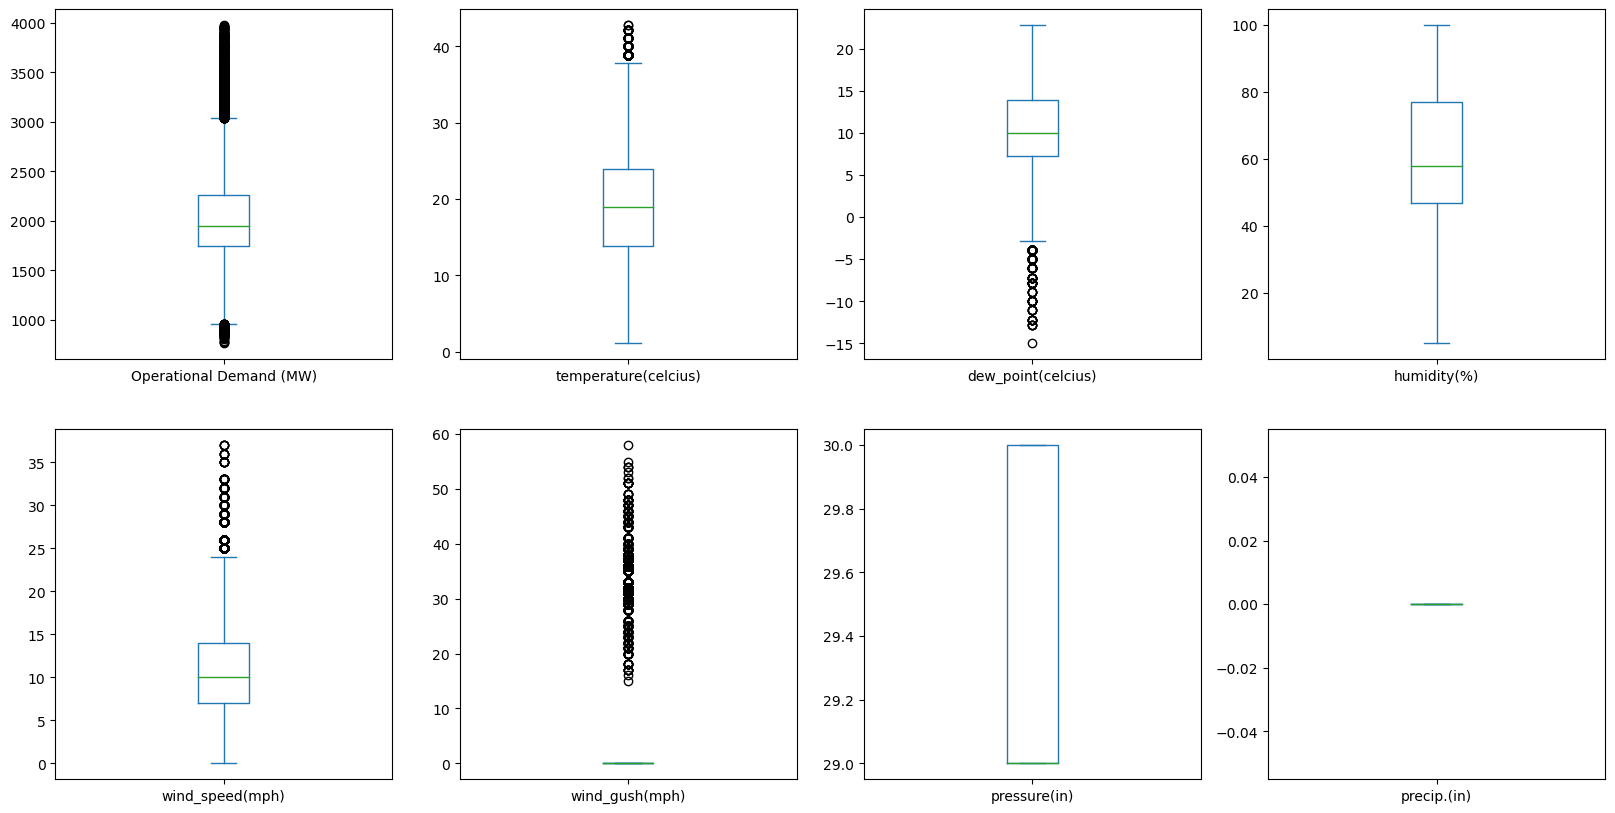

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20, 10))
aemo_wu_df['Operational Demand (MW)'].plot.box(ax=axes[0,0])
aemo_wu_df['temperature(celcius)'].plot.box(ax=axes[0,1])
aemo_wu_df['dew_point(celcius)'].plot.box(ax=axes[0,2])
aemo_wu_df['humidity(%)'].plot.box(ax=axes[0,3])
aemo_wu_df['wind_speed(mph)'].plot.box(ax=axes[1,0])
aemo_wu_df['wind_gush(mph)'].plot.box(ax=axes[1,1])
aemo_wu_df['pressure(in)'].plot.box(ax=axes[1,2])
aemo_wu_df['precip.(in)'].plot.box(ax=axes[1,3])

Wind gush is almost 0 and percipation is completely 0. So removing the columns.

In [8]:
aemo_wu_df = aemo_wu_df.drop(['wind_gush(mph)','precip.(in)'], axis = 1)
numerical.remove('wind_gush(mph)')
numerical.remove('precip.(in)')

In [9]:
aemo_wu_df.describe()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in)
count,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000,97504.000000
mean,2024.033428,19.192862,10.358651,61.199264,11.037301,29.332540
std,403.227198,6.504368,4.280321,21.330864,5.149548,0.471126
min,761.204000,1.100000,-15.000000,5.000000,0.000000,29.000000
25%,1739.725500,13.900000,7.200000,47.000000,7.000000,29.000000
50%,1949.919000,18.900000,10.000000,58.000000,10.000000,29.000000
75%,2260.464000,23.900000,13.900000,77.000000,14.000000,30.000000
max,3979.836000,42.800000,22.800000,100.000000,37.000000,30.000000


<AxesSubplot:xlabel='pressure(in)', ylabel='Operational Demand (MW)'>

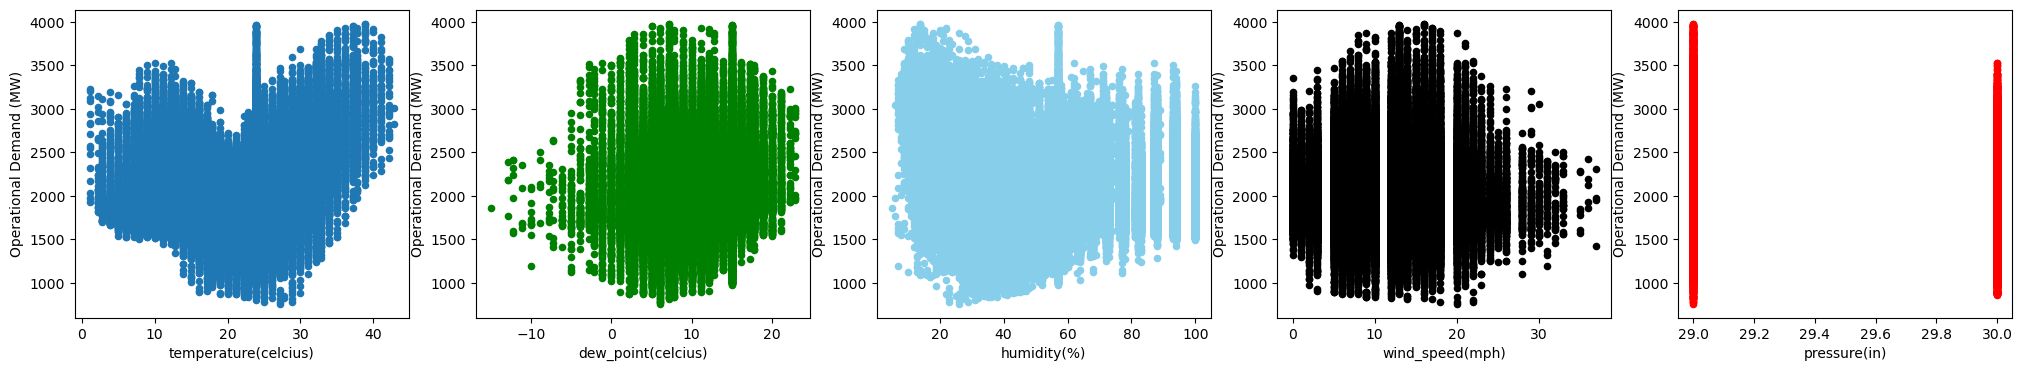

In [10]:
#pd.plotting.scatter_matrix(aemo_wu_df[['Operational Demand (MW)', 'temperature(celcius)']], figsize=(20, 10))

fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(25, 4))
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'temperature(celcius)', ax=axes[0,])
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'dew_point(celcius)', ax=axes[1,], color = "green")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'humidity(%)', ax=axes[2,], color = "skyblue")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'wind_speed(mph)', ax=axes[3,], color = "black")
aemo_wu_df.plot.scatter(y = 'Operational Demand (MW)', x = 'pressure(in)', ax=axes[4,], color = "red")


In [11]:
aemo_wu_df.corr()

,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),wind_speed(mph),pressure(in)
Operational Demand (MW),1.000000,0.196843,0.121277,-0.067923,0.044680,-0.095511
temperature(celcius),0.196843,1.000000,0.307910,-0.771656,0.397263,-0.468408
dew_point(celcius),0.121277,0.307910,1.000000,0.304610,0.035015,-0.446545
humidity(%),-0.067923,-0.771656,0.304610,1.000000,-0.439327,0.163130
wind_speed(mph),0.044680,0.397263,0.035015,-0.439327,1.000000,-0.293212
pressure(in),-0.095511,-0.468408,-0.446545,0.163130,-0.293212,1.000000


In [12]:
print("The correlation between Operational demand versus other 5 variables\n")

print("Operational Demand vs temperature\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['temperature(celcius)']))
print("Operational Demand vs dew_point\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['dew_point(celcius)']))
print("Operational Demand vs humidity\t\t: ",  aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['humidity(%)']))
print("Operational Demand vs wind_speed\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['wind_speed(mph)']))
print("Operational Demand vs pressure\t\t: ", aemo_wu_df['Operational Demand (MW)'].corr(aemo_wu_df['pressure(in)']))

The correlation between Operational demand versus other 5 variables

Operational Demand vs temperature	:  0.19684272195780672
Operational Demand vs dew_point		:  0.12127721951352617
Operational Demand vs humidity		:  -0.06792254140950538
Operational Demand vs wind_speed	:  0.044679959813612315
Operational Demand vs pressure		:  -0.09551106630966233


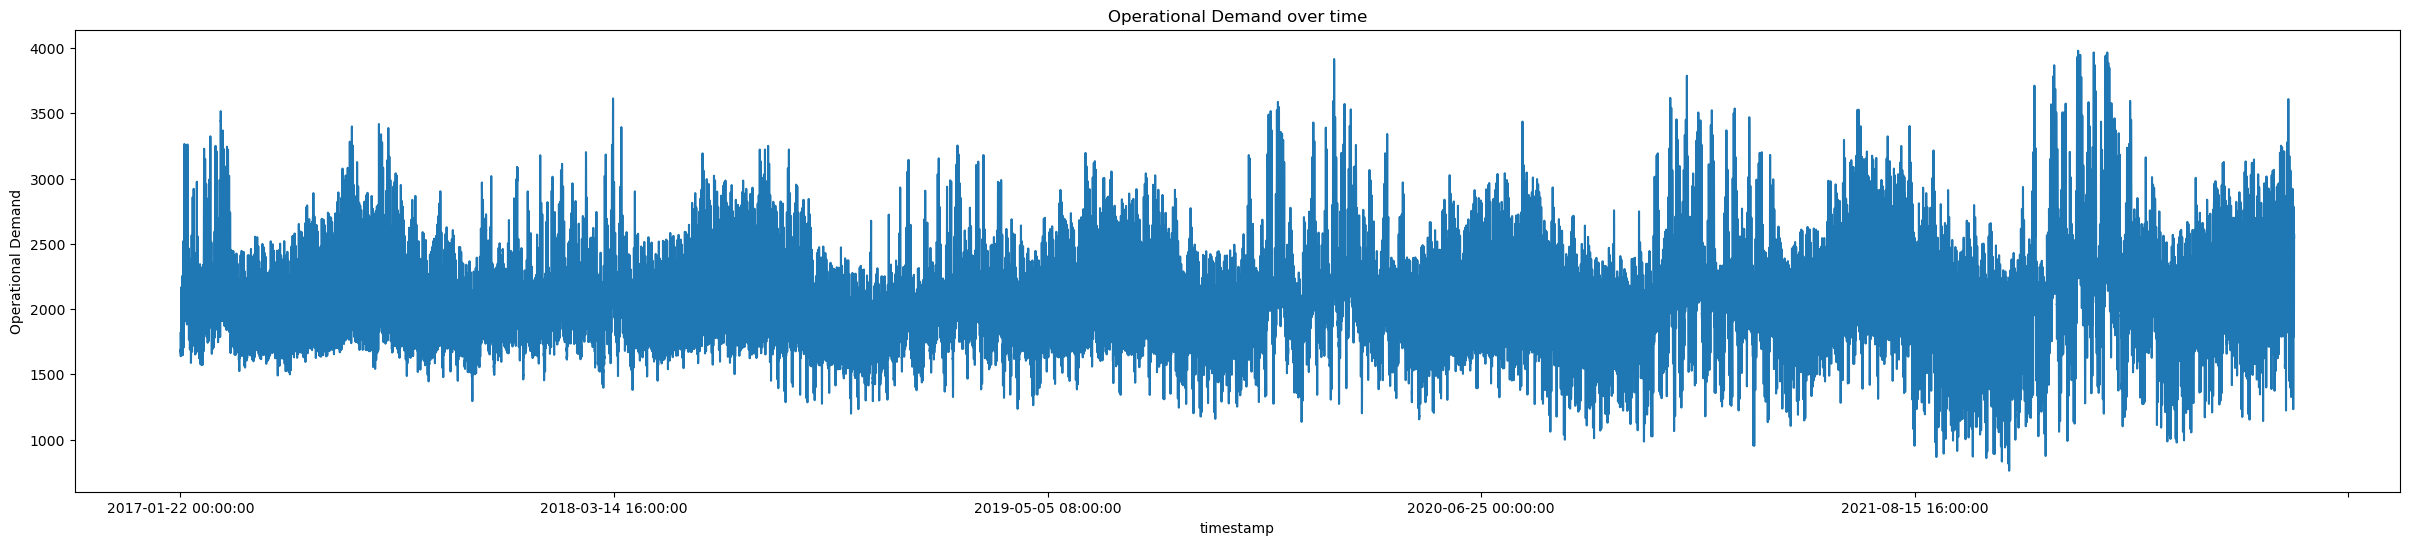

In [13]:
aemo_wu_df.plot(x = "timestamp", y = 'Operational Demand (MW)', figsize=(30, 6), legend = False)
plt.title("Operational Demand over time")
plt.ylabel("Operational Demand")
plt.show()

<AxesSubplot:xlabel='timestamp'>

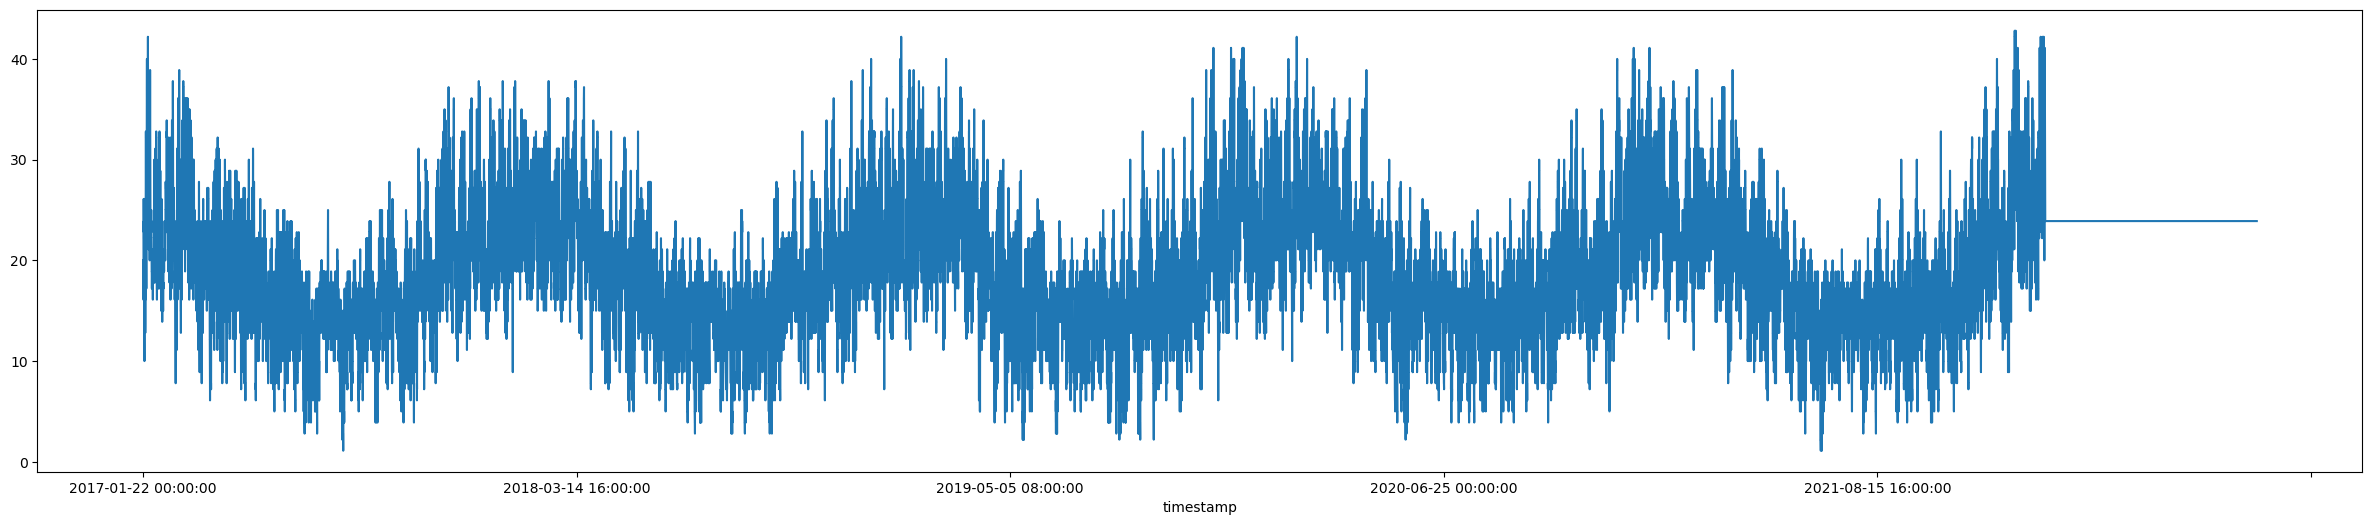

In [14]:
aemo_wu_df.plot(x = "timestamp", y = 'temperature(celcius)', figsize=(30, 6), legend = False)

<AxesSubplot:xlabel='timestamp'>

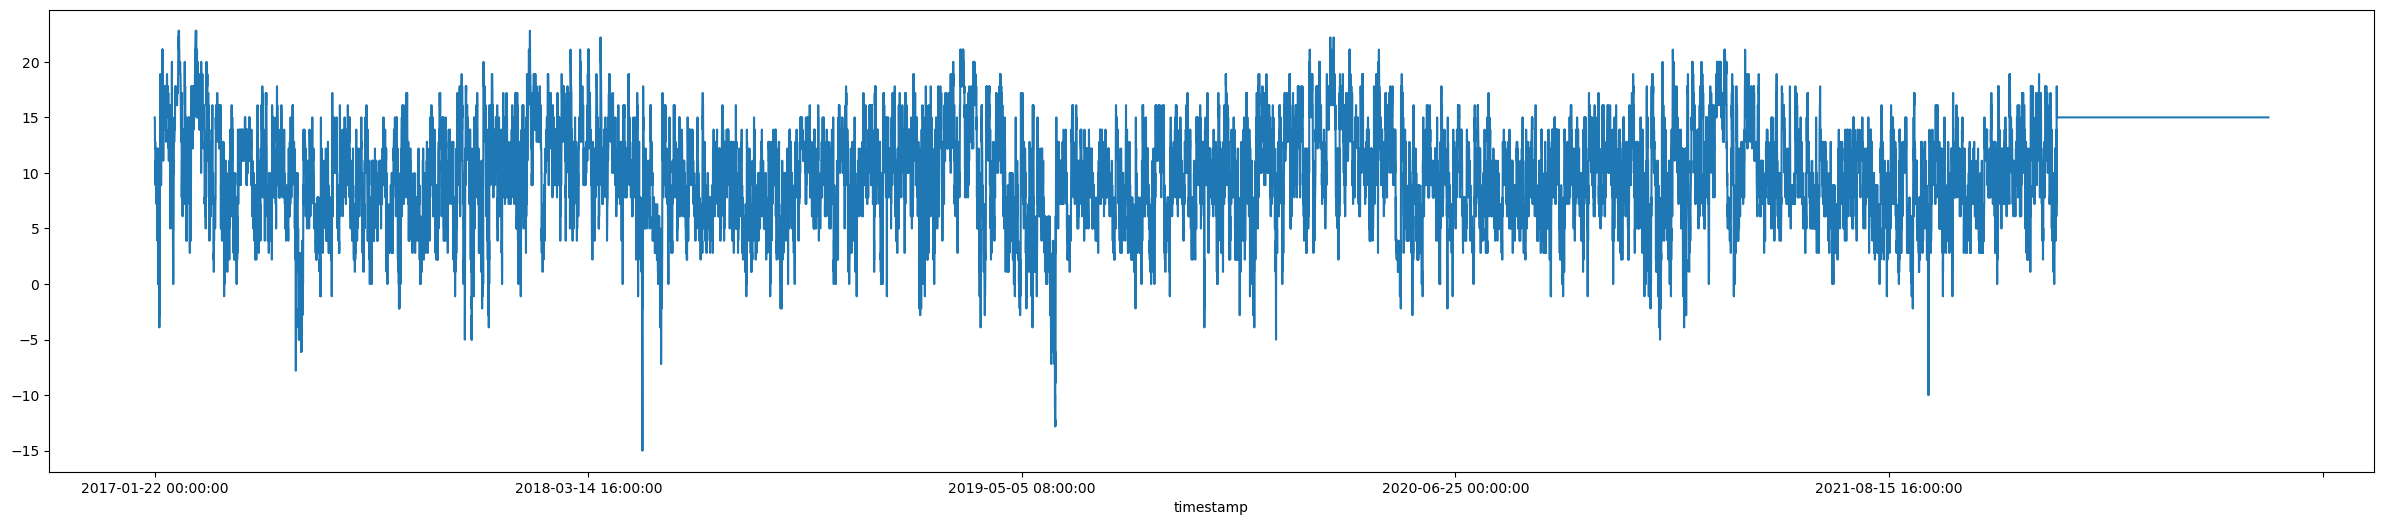

In [15]:
aemo_wu_df.plot(x = "timestamp", y = 'dew_point(celcius)', figsize=(30, 6), legend = False)

In [16]:
aemo_wu_df['year'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).year
aemo_wu_df['month'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).month
aemo_wu_df['day'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).day
aemo_wu_df['hour'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).hour
aemo_wu_df['minute'] = pd.DatetimeIndex(aemo_wu_df['timestamp']).minute
aemo_wu_df.drop(['timestamp'], axis=1, inplace=True)

In [17]:
aemo_wu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97504 entries, 0 to 97503
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Operational Demand (MW)  97504 non-null  float64
 1   temperature(celcius)     97504 non-null  float64
 2   dew_point(celcius)       97504 non-null  float64
 3   humidity(%)              97504 non-null  float64
 4   Wind                     97504 non-null  object 
 5   wind_speed(mph)          97504 non-null  float64
 6   pressure(in)             97504 non-null  float64
 7   Condition                97504 non-null  object 
 8   year                     97504 non-null  int64  
 9   month                    97504 non-null  int64  
 10  day                      97504 non-null  int64  
 11  hour                     97504 non-null  int64  
 12  minute                   97504 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 10.4+ MB


In [18]:
test_year = random.randint(2017,2022)

training_data = aemo_wu_df[aemo_wu_df['year'] != test_year]
testing_data = aemo_wu_df[aemo_wu_df['year'] == test_year]

X_train = training_data.drop('Operational Demand (MW)', axis = 1)
y_train = training_data['Operational Demand (MW)']

X_test = testing_data.drop('Operational Demand (MW)', axis = 1)
y_test = testing_data['Operational Demand (MW)']

In [19]:
scaler = StandardScaler()
lbl = LabelEncoder()

#aemo_wu_df['Wind'] = lbl.fit_transform(aemo_wu_df['Wind'].astype(str))
#aemo_wu_df['Condition'] = lbl.fit_transform(aemo_wu_df['Condition'].astype(str))

numerical = ['temperature(celcius)','dew_point(celcius)', 'humidity(%)', 'wind_speed(mph)', 'pressure(in)', 'year', 'month', 'day', 'hour', 'minute']

scaler.fit(X_train[numerical])
X_train_scaled = scaler.transform(X_train[numerical])

scaler.fit(X_test[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

In [20]:
xgb_reg = XGBRegressor()


xgb_reg.fit(X_train_scaled, y_train)

y_pred = xgb_reg.predict(X_test_scaled)


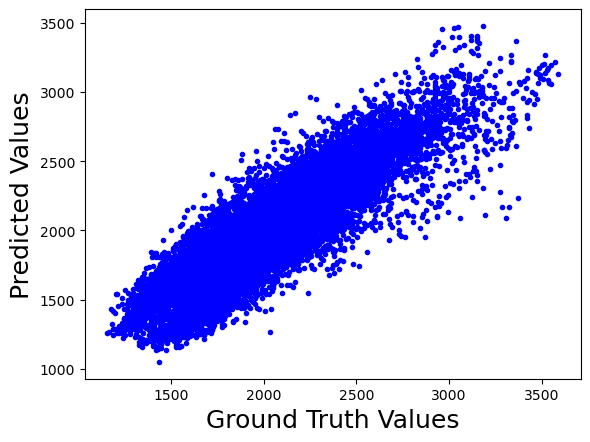

In [21]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Ground Truth Values", rotation=0, fontsize=18)

plt.ylabel("Predicted Values" , rotation=90, fontsize=18)
plt.show()

In [22]:
importance = xgb_reg.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print(' %s \t, Score: %.5f' % (numerical[i],v))

 temperature(celcius) 	, Score: 0.19309
 dew_point(celcius) 	, Score: 0.04692
 humidity(%) 	, Score: 0.06135
 wind_speed(mph) 	, Score: 0.01237
 pressure(in) 	, Score: 0.01912
 year 	, Score: 0.07039
 month 	, Score: 0.09369
 day 	, Score: 0.02364
 hour 	, Score: 0.44276
 minute 	, Score: 0.03668


In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse_svm = np.sqrt(mse)
rmse_svm

178.52799831684771

In [24]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 135.63
Mean squared error = 31872.25
Median absolute error = 105.68
Explain variance score = 0.78
R2 score = 0.77


## Performing Grid Search 

In [25]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [26]:
param_comb = 5

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=4, verbose=3, random_state=42)


In [27]:
random_search.fit(X_train_scaled, y_train)

y_pred_random = random_search.predict(X_test_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [28]:
xgb_reg_1 = XGBRegressor(colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0)


xgb_reg_1.fit(X_train_scaled, y_train)

y_pred = xgb_reg_1.predict(X_test_scaled)

In [29]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 135.25
Mean squared error = 31065.63
Median absolute error = 108.51
Explain variance score = 0.78
R2 score = 0.77


In [30]:
import xgboost as xgb

In [31]:
dtrain = xgb.DMatrix(X_train_scaled, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test_scaled, y_test, enable_categorical=True)
params = {'max_depth':5,
    'objective':'reg:squarederror',
    'num_rounds':300,
    'num_parallel_tree':3,
    'eta':0.05,
    'eval_metric':'rmse'}

In [32]:
bst = xgb.train(params, dtrain, num_boost_round=300, early_stopping_rounds=None)
preds = bst.predict(dtest)

[22:31:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "num_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [33]:
mse = mean_squared_error(y_test, preds)
rmse_svm = np.sqrt(mse)
rmse_svm

175.0503920828004

In [34]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, preds), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, preds), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, preds), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, preds), 2)) 
print("R2 score =", round(sm.r2_score(y_test, preds), 2))

Mean absolute error = 132.48
Mean squared error = 30642.64
Median absolute error = 102.54
Explain variance score = 0.79
R2 score = 0.78


In [39]:
daily_aemo_df = aemo_wu_df.groupby(["year", "month", "day"]).mean()
daily_aemo_df.head()

Operational Demand (MW)  temperature(celcius)  \
year month day                                                  
2017 1     22               1798.253542             20.593750   
           23               1930.687750             19.141667   
           24               2036.400792             23.193750   
           25               2485.888542             29.793750   
           26               2549.158958             31.733333   

                dew_point(celcius)  humidity(%)  wind_speed(mph)  \
year month day                                                     
2017 1     22            11.900000    59.104167        17.687500   
           23             9.941667    58.729167        12.166667   
           24             8.562500    43.291667        13.062500   
           25             5.989583    25.625000        11.166667   
           26             2.541667    19.000000        11.770833   

                pressure(in)  hour  minute  
year month day                              
2017 1     22           29.0  11.5    15.0  
           23           29.0  11.5    15.0  
           24           29.0  11.5    15.0  
           25           29.0  11.5    15.0  
           26           29.0  11.5    15.0

In [40]:
df1 = daily_aemo_df.sort_values('Operational Demand (MW)', ascending=False).groupby('year').head(4)
idx = df1.index
daily_aemo_df["PeakDay"] = 0
daily_aemo_df["PeakDay"].loc[idx] = 1
daily_aemo_df.head()

C:\Users\Sam\AppData\Local\Temp\ipykernel_12824\1575303386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_aemo_df["PeakDay"].loc[idx] = 1


Operational Demand (MW)  temperature(celcius)  \
year month day                                                  
2017 1     22               1798.253542             20.593750   
           23               1930.687750             19.141667   
           24               2036.400792             23.193750   
           25               2485.888542             29.793750   
           26               2549.158958             31.733333   

                dew_point(celcius)  humidity(%)  wind_speed(mph)  \
year month day                                                     
2017 1     22            11.900000    59.104167        17.687500   
           23             9.941667    58.729167        12.166667   
           24             8.562500    43.291667        13.062500   
           25             5.989583    25.625000        11.166667   
           26             2.541667    19.000000        11.770833   

                pressure(in)  hour  minute  PeakDay  
year month day                                       
2017 1     22           29.0  11.5    15.0        0  
           23           29.0  11.5    15.0        0  
           24           29.0  11.5    15.0        0  
           25           29.0  11.5    15.0        0  
           26           29.0  11.5    15.0        0

In [42]:
test_year = random.randint(2017,2022)
no_demand_df = daily_aemo_df.drop(["Operational Demand (MW)", "hour", "minute"], axis=1)

years = [2017,2018,2019,2020,2021,2022]
years.remove(test_year)

scaler = StandardScaler()
#lbl = LabelEncoder()

#no_demand_df['Wind'] = lbl.fit_transform(no_demand_df['Wind'].astype(str))
#no_demand_df['Condition'] = lbl.fit_transform(no_demand_df['Condition'].astype(str))

numerical = ['temperature(celcius)','dew_point(celcius)', 'humidity(%)', 'wind_speed(mph)', 'pressure(in)']

scaler.fit(no_demand_df[numerical])
no_demand_df[numerical] = scaler.transform(no_demand_df[numerical])

training_data = no_demand_df.loc[(years), :]
testing_data = no_demand_df.loc[(test_year), :]

X_train = training_data.drop('PeakDay', axis = 1)
y_train = training_data['PeakDay']

X_test = testing_data.drop('PeakDay', axis = 1)
y_test = testing_data['PeakDay']

In [79]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

params = {'max_depth':10,
    'objective':'binary:logistic',
    'base_score':0.1,
    'num_parallel_tree':20,
    'eta':0.05,
    'eval_metric':'error@0.9'}

C:\Users\Sam\Anaconda3\envs\capstone\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [82]:
bst = xgb.train(params, dtrain, num_boost_round=300, early_stopping_rounds=None)
preds = bst.predict(dtest)
preds = [0 if i < 0.5 else 1 for i in preds]

In [83]:
pct = sm.accuracy_score(y_test, preds)
null = sm.accuracy_score(y_test, np.zeros(len(preds)))
print(pct, null)

0.9863013698630136 0.989041095890411
